In [1]:
# Fix the random seed.
import random
import numpy as np
import torch

%load_ext autoreload
%autoreload 2

import os
import sys


project_path = os.environ.get('PROJECT_PATH', '../')

sys.path.append(os.path.join(project_path, 'src'))

In [2]:
import matplotlib.pyplot as plt

def scale_to_01(tensor):
    """
    Function to scale score a tesnor of batch size x dim
    """
    scaled_tensor = (tensor - tensor.min().item()) / (tensor.max().item() - tensor.min().item())
    return scaled_tensor

def show_image(image, name_img: str):
    """
    Instance method that would plot an
    image to see if the dataset is properly set.
    """
    f, ax1 = plt.subplots(1, 1)
    image = (image - image.min()) / (image.max() - image.min()) 
    ax1.set_title('Desired image ' + name_img)
    ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
    plt.show()

In [3]:
def print_num_params(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'Total parameters: {total_params}, Trainable parameters: {trainable_params}')

In [4]:
# load model from checkpoint using torch
import torch
from train.gen_classifier import GenClassifier

vae = GenClassifier()

In [9]:
print_num_params(vae.downsample)

Total parameters: 6437480, Trainable parameters: 6437480


In [4]:
# load model from checkpoint using torch
import torch
from train.vae import VAE

vae = VAE()

In [23]:
vae

VAE(
  (encoder_module): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [29]:
import torch.nn as nn

print_num_params(vae.decoder_module)

Total parameters: 25286233, Trainable parameters: 25286233


In [5]:
from train.vae import VAE

vae = VAE()
vae.load_from_checkpoint('/project/cs231/CS231N-Final-Proj/models/vae/2024-05-30_08-04-55-toy-vae-20-epochs')

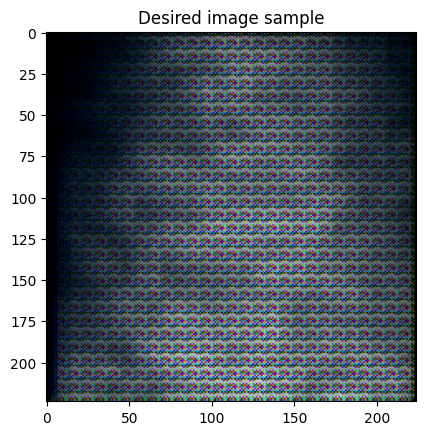

In [6]:
sample = vae.sample()
show_image(sample[0], 'sample')

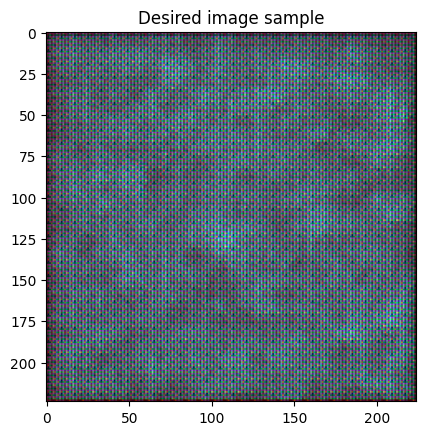

In [8]:
sample = vae.sample()
show_image(sample[0], 'sample')

In [9]:
torch.min(sample)

tensor(0.)

In [10]:
# load model from checkpoint using torch
import torch
from train.vae import VAE

vae = VAE()

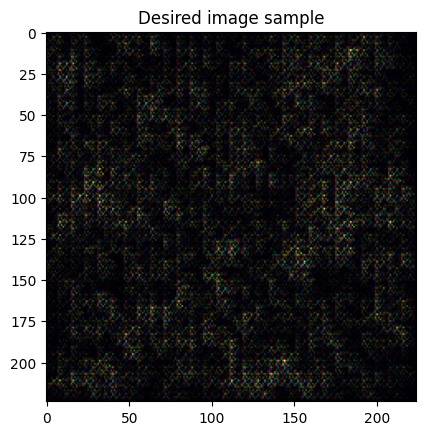

In [11]:
sample = vae.sample()
show_image(sample[0], 'sample')

In [41]:
total_params = sum(p.numel() for p in vae.parameters())
trainable_params = sum(p.numel() for p in vae.parameters() if p.requires_grad)
total_params, trainable_params

(152405085, 137690397)